In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectKBest, chi2


In [2]:
df=pd.read_csv('completeSpamAssassin.csv')
df1=pd.read_csv('mail_data.csv')
df1['Body']=df1['Message']
Label = pd.get_dummies(df1['Category'], drop_first = True)
df1=pd.concat([df1,Label],axis=1)
df1['Label']=df1['spam']
df1=df1.drop(['spam','Category','Message'],axis=1)
df1

,Body,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [3]:
df=pd.concat([df,df1])
df

,Unnamed: 0,Body,Label
0,0.0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1.0,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2.0,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3.0,##############################################...,1
4,4.0,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
5567,NaN,This is the 2nd time we have tried 2 contact u...,1
5568,NaN,Will ü b going to esplanade fr home?,0
5569,NaN,"Pity, * was in mood for that. So...any other s...",0
5570,NaN,The guy did some bitching but I acted like i'd...,0


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [5]:
df=df.dropna()
df

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


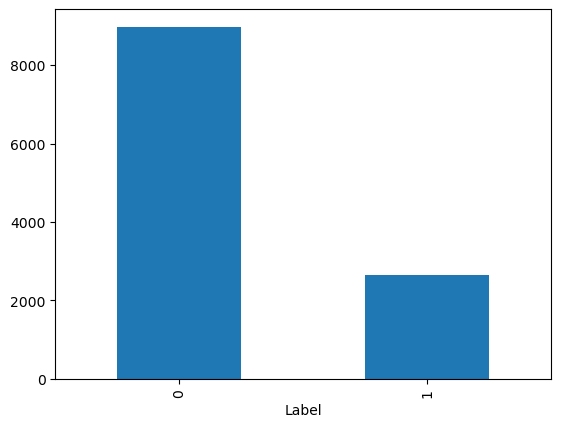

In [6]:
import matplotlib.pyplot as plt
df.groupby('Label').Body.count().plot.bar(ylim=0)
plt.show()

In [7]:
import re,string
stemmer=PorterStemmer()
nltk.download("stopwords")
words=stopwords.words('english')

df['cleaned']=df['Body'].apply(lambda x:" ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to C:\Users\Kashyap
[nltk_data]     Ghimire\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Kashyap Ghimire\AppData\Local\Temp\ipykernel_20164\1507863272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned']=df['Body'].apply(lambda x:" ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in words]).lower())


In [8]:
df

,Body,Label,cleaned
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save life insur whi spend more than you have t...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,fight the risk cancer http www adclick ws p cf...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,fight the risk cancer http www adclick ws p cf...
3,##############################################...,1,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,i thought might like slim down guarante lose l...
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,thi nd time tri contact u u pound prize claim ...
5568,Will ü b going to esplanade fr home?,0,will b go esplanad fr home
5569,"Pity, * was in mood for that. So...any other s...",0,piti mood so suggest
5570,The guy did some bitching but I acted like i'd...,0,the guy bitch i act like interest buy someth e...


In [9]:
df=df.drop(['Body'],axis=1)

In [10]:
df

,Label,cleaned
0,1,save life insur whi spend more than you have t...
1,1,fight the risk cancer http www adclick ws p cf...
2,1,fight the risk cancer http www adclick ws p cf...
3,1,adult club offer free membership instant acces...
4,1,i thought might like slim down guarante lose l...
...,...,...
5567,1,thi nd time tri contact u u pound prize claim ...
5568,0,will b go esplanad fr home
5569,0,piti mood so suggest
5570,0,the guy bitch i act like interest buy someth e...


In [11]:
log_regression = LogisticRegression()
# vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
vectorizer = TfidfVectorizer(stop_words="english")
X = df['cleaned']
Y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25) 

#Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)), 
                     ('clf', LogisticRegression(random_state=0))]) 
#Training model
model = pipeline.fit(X_train, y_train)

In [12]:
X_test

182                                           lol u trust
2196    from fork admin xent com mailto fork admin xen...
3782    dear friend sorri late inform today birthday l...
3106                                         or remind hr
72              hi babe im at home now wanna do someth xx
                              ...                        
359     i actor when work work even sleep late sinc un...
3316    tim anoth area potenti fruit studi clear highe...
3628               still chanc if search hard get let tri
5326                                      what make happi
1680    today song dedic day which song u dedic send u...
Name: cleaned, Length: 2905, dtype: object

In [13]:
print(X_test[10:11])
y_test[10:11]

5148    k come wenev u lik come also tel vikki come ge...
Name: cleaned, dtype: object


5148    0
Name: Label, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
print(accuracy_score(y_test,predict))
print('\n')
print(predict)

0.9493975903614458


[0 0 0 ... 0 0 0]


In [15]:
value=model.predict(X_test[4:5])
if value==[0]:
    print('Ham')
else:
    print('Spam')
# print(model.predict(data['mail']))

Ham


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2259
           1       0.90      0.87      0.88       646

    accuracy                           0.95      2905
   macro avg       0.93      0.92      0.93      2905
weighted avg       0.95      0.95      0.95      2905



<Axes: >

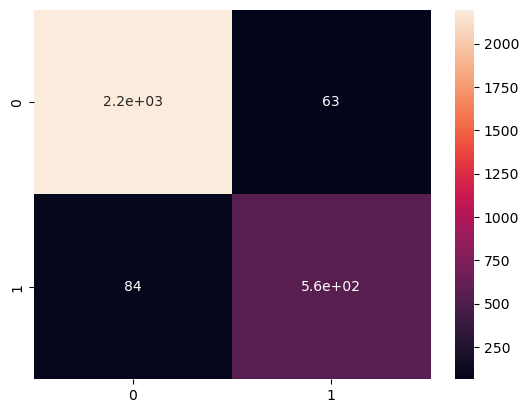

In [16]:
#confusion matrix and classification report
ytest=np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
cm=confusion_matrix(ytest,model.predict(X_test))
sns.heatmap(cm,annot=True)

In [17]:
#to check  any mail entered by the user:
def check_mail():
    data={'mail':[input("Enter mail to check: ") for i in range(1)]}
    data=pd.DataFrame(data)
    # value=model.predict(X_test[10:11])
    value=model.predict(data['mail'])
    if value==[0]:
        print('Ham')
    else:
        print('Spam')
    # print(model.predict(data['mail']))

In [18]:
check_mail()

Enter mail to check: Ready to skyrocket your career with Machine Learning? Here's your chance!  🌟 Earlybird Offer Alert! 🌟  Get our brand-new "Machine Learning with TensorFlow on Google Cloud" course at the lowest price possible on Udemy! Use coupon code EARLYBIRD during checkout.  Machine Learning with TensorFlow on Google Cloud  ML using tensorflow 📆 Offer Valid for 5 Days Only  Here's why you can't afford to miss it:  🔥 Hands-on Labs: Includes real-world projects and exercises, so you can hit the ground running.  🚀 Career Growth: This course can be your ticket to high-demand job opportunities and career advancement.  Other Machine Learning courses on SALE (Use code: SALEML and get them at lowest price possible)  Machine Learning using Python - Learn how to train ML models such as linear and logistic regression, decision trees, ensemble techniques and much more in Python.  Machine Learning using R Studio - Same models but implemented in R programming language.  ML using Python   ML u